### ISyE6669 HW04 - Graham Billey, Spring 2020

> Minimize each of the following functions using an appropriate routine from scipy.optimize. Provide a printout of your code, along with the solution.


In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import Bounds
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

### 1. $ f(x_1, x_2, x_3) = |x_1^2 - 3x_3 + 5| + (x_2 - 3)^2 $ starting from the point (0, 0, 0)

In [36]:
# Unconstrained, multivariate objective function, given starting point.

# Define the objective function.
def f1(x):
    return abs(x[0]**2 - 3*x[2] + 5) + (x[1] - 3)**2

# Define the initial guess.
x0 = np.array([0, 0, 0])

# Solve.
a = minimize(f1, x0)
print(a,'\n')
print(f'The minimum occurs at: {a["x"]} and the function value is {a["fun"]}')

      fun: 0.0029196009731135646
 hess_inv: array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  5.78442087e-01, -6.58455379e-05],
       [ 0.00000000e+00, -6.58455379e-05,  2.28078324e-02]])
      jac: array([0.        , 0.10806647, 1.49951768])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 602
      nit: 4
     njev: 118
   status: 2
  success: False
        x: array([0.        , 3.05403323, 1.66666666]) 

The minimum occurs at: [0.         3.05403323 1.66666666] and the function value is 0.0029196009731135646


### 2. $ f(x) = (x−1)(x−2)(x−3) +x^5 $ over the interval $ [− 10 ,10] $

In [52]:
# Constrained, univariate objective function, not given starting point.

# Define the objective function.
def f2(x):
    return (x-1) * (x-2) * (x-3) + x**5

# Define the initial and boundary conditions.
x0 = 0
bounds = [(-10, 10)]

# Solve.
b = minimize(f2, x0, bounds=bounds)
print(b,'\n')
print(f'The minimum occurs at: {b["x"]} and the function value is {b["fun"]}')

      fun: array([-101716.])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([50431.00391049])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 1
   status: 0
  success: True
        x: array([-10.]) 

The minimum occurs at: [-10.] and the function value is [-101716.]


### 3. Let $ A = \begin{bmatrix} 2 & -3 \\ 4 & 1 \end{bmatrix} $ and $ b = \begin{bmatrix} 9 \\ 1 \end{bmatrix} $ . Then $ f(x) = ||Ax - b|| $ where $ X \in \mathbb{R} ^2 $. Start from $(0, 0)$.

In [67]:
# Unconstrained, multivariate objective function, given starting point.

# Define the objective function.
A = np.array([[2, -3],
              [4,  1]])
b = np.array([[9], 
              [1]])

def f3(x):
    return np.linalg.norm(A @ x - b)

# Define the initial condition.
x0 = np.array([0,0])

# Solve.
c = minimize(f3, x0)
print(c,'\n')
print(f'The minimum occurs at: {c["x"]} and the function value is {c["fun"]}')

      fun: 8.0
 hess_inv: array([[0.20422642, 0.04104529],
       [0.04104529, 0.40852785]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([ 1.42857142, -0.71428573]) 

The minimum occurs at: [ 1.42857142 -0.71428573] and the function value is 8.0


### 4. $ f(x_1, x_2) = (1.5 - x_1 + x_1 x_2)^2 + (2.25 - x_1 + x_1 x_2^2)^2 + (2.65 - x_1 + x_1 x_2^3)^2 $ over the box $ -4.5 \leq x_1, x_2 \leq 4.5 $. Start from $(0, 0)$. Plot the function $ f(x_1, x_2, ) $ over the box $ [-4.5, 4.5]^2 $ using both a 2D contour plot and a 3D plot.

In [166]:
# Constrained, multivariate objective function, given starting point.

# Define the objective function
def f4(x):
    return (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2+ (2.65 - x[0] + x[0]*x[1]**3)**2

# Define the initial and boundary conditions.
x0 = np.array([0,0])
bounds = Bounds([-4.5, -4.5], [4.5, 4.5])

# Solve.
d = minimize(f4, x0, bounds=bounds)
print(d,'\n')
print(f'The minimum occurs at: {d["x"]} and the function value is {d["fun"]}')

      fun: 9.413838780655419e-05
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.84876257e-06,  6.68528275e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 42
      nit: 11
   status: 0
  success: True
        x: array([3.05059374, 0.50986291]) 

The minimum occurs at: [3.05059374 0.50986291] and the function value is 9.413838780655419e-05


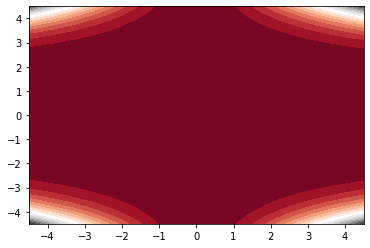

In [207]:
# Plot the function using 2D and 3D contour plots.
x = np.linspace(-4.5, 4.5, 100)
y = np.linspace(-4.5, 4.5, 100)
X, Y = np.meshgrid(x, y)
Z = f4(np.array([X,Y]))
h = plt.contourf(X,Y,Z, 20, cmap='RdGy')

plt.show()

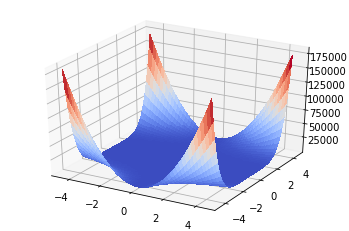

In [208]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

**The values of the objective function in Q4 rise so quickly near the corners of the boundary, that any variation near the minimum is impossible to see in either plot.**

### 5. $ f(x_1, x_2, x_3, x_4) = \frac{1}{2} \sum_{i=1}^{4} (x_i^4 - 16x_i^2 + 5x_i)$ over the box $ -4 \leq x_i \leq 4 $, for $ i = 1, ..., 4 $.

In [204]:
# Constrained, multivariate objective function, not given starting point.

# Define the objective function
def f5(x):
    ans = 0
    for i in range(4):
        ans += x[i]**4 - 16*x[i]**2 + 5*x[i]
    return 0.5*ans

# Define the initial and boundary conditions.
x0 = np.array([0,0,0,0])
bounds = Bounds(-4, 4)

# Solve.
e = minimize(f5, x0, bounds=bounds)
print(e,'\n')
print(f'The minimum occurs at: {e["x"]} and the function value is {e["fun"]}')

      fun: -156.66466281508528
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.84217094e-06, -2.84217094e-06, -2.84217094e-06, -2.84217094e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 40
      nit: 6
   status: 0
  success: True
        x: array([-2.9035341 , -2.9035341 , -2.9035341 , -2.90353409]) 

The minimum occurs at: [-2.9035341  -2.9035341  -2.9035341  -2.90353409] and the function value is -156.66466281508528


### 6. $ f(x_1, x_2) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2 $ over $ -5 \leq x_1, x_2 \leq 5 $. Try to find as many local minimum as you can. Plot the function $ f(x_1, x_2) $ over the box $ [-4.5, 4.5]^2 $ using both a 2D contour plot and a 3D plot. Hint: You can start the algorithm you choose to use from a different starting point.

In [206]:
# Constrained, multivariate objective function, not given starting point.

# Define the objective function
def f6(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2


      fun: 1.715314144416204e-12
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.34479712e-05,  1.36664583e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 39
      nit: 8
   status: 0
  success: True
        x: array([2.99999977, 2.00000017]) 

The minimum occurs at: [2.99999977 2.00000017] and the function value is 1.715314144416204e-12


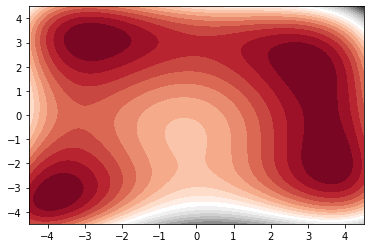

In [209]:
# Plot the function using 2D and 3D contour plots.
x = np.linspace(-4.5, 4.5, 100)
y = np.linspace(-4.5, 4.5, 100)
X, Y = np.meshgrid(x, y)
Z = f6(np.array([X,Y]))
h = plt.contourf(X,Y,Z, 20, cmap='RdGy')

plt.show()

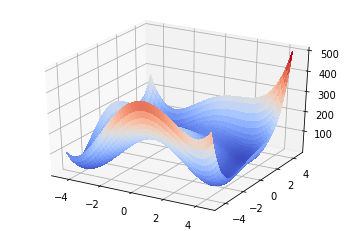

In [212]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

**There appear to be local minima around `[-4, -3]`, `[-3, 3]`, `[3, 2]`, and `[3.5, -2]`.** I will use these points as initial conditions to narrow in on each.

In [211]:
# Define the initial and boundary conditions.
x0 = np.array([-4,-3])
bounds = Bounds(-4.5, 4.5)
f1 = minimize(f6, x0, bounds=bounds)
print(f'One minimum occurs at: {f1["x"]} and the function value is {f1["fun"]}')

# Define the initial and boundary conditions.
x0 = np.array([-3,3])
bounds = Bounds(-4.5, 4.5)
f1 = minimize(f6, x0, bounds=bounds)
print(f'One minimum occurs at: {f1["x"]} and the function value is {f1["fun"]}')

# Define the initial and boundary conditions.
x0 = np.array([3,2])
bounds = Bounds(-4.5, 4.5)
f1 = minimize(f6, x0, bounds=bounds)
print(f'One minimum occurs at: {f1["x"]} and the function value is {f1["fun"]}')

# Define the initial and boundary conditions.
x0 = np.array([3.5,-2])
bounds = Bounds(-4.5, 4.5)
f1 = minimize(f6, x0, bounds=bounds)
print(f'One minimum occurs at: {f1["x"]} and the function value is {f1["fun"]}')

One minimum occurs at: [-3.77931028 -3.283186  ] and the function value is 2.9800159669213803e-14
One minimum occurs at: [-2.80511809  3.13131251] and the function value is 2.9299201788100018e-15
One minimum occurs at: [3. 2.] and the function value is 0.0
One minimum occurs at: [ 3.58442835 -1.84812656] and the function value is 1.471449661937234e-14
